In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("E:/Jupyter/3.15junchen_hire_project/data.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### 简单看下数

In [4]:
df.head(10)

type  txAudioKBitrate_lead_1  txAudioKBitrate_lead_2  \
0     0                      54                    53.0   
1     0                      54                    53.0   
2     0                      53                    53.0   
3     0                      53                    53.0   
4     0                      53                    12.0   
5     0                      53                    53.0   
6     0                      53                    54.0   
7     0                       7                     7.0   
8     0                      54                    54.0   
9     2                      53                    53.0   

   txAudioKBitrate_lead_3  txAudioKBitrate_lead_4  txAudioKBitrate_lead_5  \
0                    53.0                    54.0                    53.0   
1                    53.0                    53.0                    54.0   
2                    53.0                    53.0                    52.0   
3                    52.0                    54.0                    54.0   
4                    53.0                    54.0                    51.0   
5                    53.0                    53.0                    54.0   
6                    53.0                    53.0                    53.0   
7                     7.0                     7.0                     7.0   
8                    53.0                    54.0                    53.0   
9                    53.0                    54.0                    53.0   

   txAudioKBitrate_lead_6  txAudioKBitrate_lead_7  txAudioKBitrate_lead_8  \
0                    53.0                    53.0                    52.0   
1                    53.0                    53.0                    53.0   
2                    53.0                    53.0                    53.0   
3                    53.0                    52.0                    54.0   
4                    43.0                    42.0                    47.0   
5                    53.0                    53.0                    54.0   
6                    52.0                    53.0                    54.0   
7                     7.0                     7.0                     7.0   
8                    53.0                    54.0                    53.0   
9                    53.0                    52.0                    53.0   

   txAudioKBitrate_lead_9  txAudioKBitrate_lead_10  txAudioKBitrate_lead_11  \
0                    54.0                     54.0                     53.0   
1                    53.0                     53.0                     53.0   
2                    53.0                     54.0                     53.0   
3                    52.0                     53.0                     54.0   
4                    53.0                     53.0                     52.0   
5                    54.0                     53.0                     53.0   
6                    53.0                     53.0                     53.0   
7                     7.0                      7.0                      7.0   
8                    46.0                     49.0                     53.0   
9                    53.0                     53.0                     53.0   

   txAudioKBitrate_lead_12  txAudioKBitrate_lead_13  txAudioKBitrate_lead_14  \
0                     53.0                     53.0                     53.0   
1                     53.0                     54.0                     52.0   
2                     53.0                     54.0                     53.0   
3                     49.0                     62.0                     60.0   
4                     44.0                     43.0                     42.0   
5                     53.0                     54.0                     53.0   
6                     53.0                     53.0                     54.0   
7                      7.0                      7.0                      7.0   
8                     52.0                     49.0                

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 1281 entries, type to memory_inactive_lag_40
dtypes: float64(1221), int64(60)
memory usage: 48.9 MB


In [71]:
df['type'].value_counts()

0    3944
2     668
1     388
Name: type, dtype: int64

### 数据不平衡，做三分类的话可从正常课堂中抽样

### 删掉sentFrameRate和sentBitrate两个干扰项，且由于提交工单时后续情况尚未发生，去掉所有带\_lag\_的特征

In [5]:
del_columns = df.columns.str.contains('sentFrameRate') + df.columns.str.contains('sentBitrate') +df.columns.str.contains('_lag_') 

In [6]:
df = df.loc[:,~del_columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 561 entries, type to memory_inactive_lead_40
dtypes: float64(549), int64(12)
memory usage: 21.4 MB


### 样本量5000，特征561——考虑降维，此前先做特征工程

In [14]:
df.describe()

,type,txAudioKBitrate_lead_1,txAudioKBitrate_lead_2,txAudioKBitrate_lead_3,txAudioKBitrate_lead_4,txAudioKBitrate_lead_5,txAudioKBitrate_lead_6,txAudioKBitrate_lead_7,txAudioKBitrate_lead_8,txAudioKBitrate_lead_9,txAudioKBitrate_lead_10,txAudioKBitrate_lead_11,txAudioKBitrate_lead_12,txAudioKBitrate_lead_13,txAudioKBitrate_lead_14,txAudioKBitrate_lead_15,txAudioKBitrate_lead_16,txAudioKBitrate_lead_17,txAudioKBitrate_lead_18,txAudioKBitrate_lead_19,txAudioKBitrate_lead_20,txAudioKBitrate_lead_21,txAudioKBitrate_lead_22,txAudioKBitrate_lead_23,txAudioKBitrate_lead_24,txAudioKBitrate_lead_25,txAudioKBitrate_lead_26,txAudioKBitrate_lead_27,txAudioKBitrate_lead_28,txAudioKBitrate_lead_29,txAudioKBitrate_lead_30,txAudioKBitrate_lead_31,txAudioKBitrate_lead_32,txAudioKBitrate_lead_33,txAudioKBitrate_lead_34,txAudioKBitrate_lead_35,txAudioKBitrate_lead_36,txAudioKBitrate_lead_37,txAudioKBitrate_lead_38,txAudioKBitrate_lead_39,txAudioKBitrate_lead_40,cpuTotalUsage_lead_1,cpuTotalUsage_lead_2,cpuTotalUsage_lead_3,cpuTotalUsage_lead_4,cpuTotalUsage_lead_5,cpuTotalUsage_lead_6,cpuTotalUsage_lead_7,cpuTotalUsage_lead_8,cpuTotalUsage_lead_9,cpuTotalUsage_lead_10,cpuTotalUsage_lead_11,cpuTotalUsage_lead_12,cpuTotalUsage_lead_13,cpuTotalUsage_lead_14,cpuTotalUsage_lead_15,cpuTotalUsage_lead_16,cpuTotalUsage_lead_17,cpuTotalUsage_lead_18,cpuTotalUsage_lead_19,cpuTotalUsage_lead_20,cpuTotalUsage_lead_21,cpuTotalUsage_lead_22,cpuTotalUsage_lead_23,cpuTotalUsage_lead_24,cpuTotalUsage_lead_25,cpuTotalUsage_lead_26,cpuTotalUsage_lead_27,cpuTotalUsage_lead_28,cpuTotalUsage_lead_29,cpuTotalUsage_lead_30,cpuTotalUsage_lead_31,cpuTotalUsage_lead_32,cpuTotalUsage_lead_33,cpuTotalUsage_lead_34,cpuTotalUsage_lead_35,cpuTotalUsage_lead_36,cpuTotalUsage_lead_37,cpuTotalUsage_lead_38,cpuTotalUsage_lead_39,cpuTotalUsage_lead_40,rxAudioKBitrate_lead_1,rxAudioKBitrate_lead_2,rxAudioKBitrate_lead_3,rxAudioKBitrate_lead_4,rxAudioKBitrate_lead_5,rxAudioKBitrate_lead_6,rxAudioKBitrate_lead_7,rxAudioKBitrate_lead_8,rxAudioKBitrate_lead_9,rxAudioKBitrate_lead_10,rxAudioKBitrate_lead_11,rxAudioKBitrate_lead_12,rxAudioKBitrate_lead_13,rxAudioKBitrate_lead_14,rxAudioKBitrate_lead_15,rxAudioKBitrate_lead_16,rxAudioKBitrate_lead_17,rxAudioKBitrate_lead_18,rxAudioKBitrate_lead_19,rxAudioKBitrate_lead_20,rxAudioKBitrate_lead_21,rxAudioKBitrate_lead_22,rxAudioKBitrate_lead_23,rxAudioKBitrate_lead_24,rxAudioKBitrate_lead_25,rxAudioKBitrate_lead_26,rxAudioKBitrate_lead_27,rxAudioKBitrate_lead_28,rxAudioKBitrate_lead_29,rxAudioKBitrate_lead_30,rxAudioKBitrate_lead_31,rxAudioKBitrate_lead_32,rxAudioKBitrate_lead_33,rxAudioKBitrate_lead_34,rxAudioKBitrate_lead_35,rxAudioKBitrate_lead_36,rxAudioKBitrate_lead_37,rxAudioKBitrate_lead_38,rxAudioKBitrate_lead_39,rxAudioKBitrate_lead_40,cpuAppUsage_lead_1,cpuAppUsage_lead_2,cpuAppUsage_lead_3,cpuAppUsage_lead_4,cpuAppUsage_lead_5,cpuAppUsage_lead_6,cpuAppUsage_lead_7,cpuAppUsage_lead_8,cpuAppUsage_lead_9,cpuAppUsage_lead_10,cpuAppUsage_lead_11,cpuAppUsage_lead_12,cpuAppUsage_lead_13,cpuAppUsage_lead_14,cpuAppUsage_lead_15,cpuAppUsage_lead_16,cpuAppUsage_lead_17,cpuAppUsage_lead_18,cpuAppUsage_lead_19,cpuAppUsage_lead_20,cpuAppUsage_lead_21,cpuAppUsage_lead_22,cpuAppUsage_lead_23,cpuAppUsage_lead_24,cpuAppUsage_lead_25,cpuAppUsage_lead_26,cpuAppUsage_lead_27,cpuAppUsage_lead_28,cpuAppUsage_lead_29,cpuAppUsage_lead_30,cpuAppUsage_lead_31,cpuAppUsage_lead_32,cpuAppUsage_lead_33,cpuAppUsage_lead_34,cpuAppUsage_lead_35,cpuAppUsage_lead_36,cpuAppUsage_lead_37,cpuAppUsage_lead_38,cpuAppUsage_lead_39,cpuAppUsage_lead_40,txVideoKBitrate_lead_1,txVideoKBitrate_lead_2,txVideoKBitrate_lead_3,txVideoKBitrate_lead_4,txVideoKBitrate_lead_5,txVideoKBitrate_lead_6,txVideoKBitrate_lead_7,txVideoKBitrate_lead_8,txVideoKBitrate_lead_9,txVideoKBitrate_lead_10,txVideoKBitrate_lead_11,txVideoKBitrate_lead_12,txVideoKBitrate_lead_13,txVideoKBitrate_lead_14,txVideoKBitrate_lead_15,txVideoKBitrate_lead_16,txVideoKBitrate_lead_17,txVideoKBitrate_lead_18,txVideo

In [15]:
df.count()

type                       5000
txAudioKBitrate_lead_1     5000
txAudioKBitrate_lead_2     4998
txAudioKBitrate_lead_3     4998
txAudioKBitrate_lead_4     4998
txAudioKBitrate_lead_5     4997
txAudioKBitrate_lead_6     4997
txAudioKBitrate_lead_7     4997
txAudioKBitrate_lead_8     4994
txAudioKBitrate_lead_9     4992
txAudioKBitrate_lead_10    4991
txAudioKBitrate_lead_11    4991
txAudioKBitrate_lead_12    4989
txAudioKBitrate_lead_13    4988
txAudioKBitrate_lead_14    4988
txAudioKBitrate_lead_15    4987
txAudioKBitrate_lead_16    4985
txAudioKBitrate_lead_17    4985
txAudioKBitrate_lead_18    4985
txAudioKBitrate_lead_19    4984
txAudioKBitrate_lead_20    4984
txAudioKBitrate_lead_21    4984
txAudioKBitrate_lead_22    4984
txAudioKBitrate_lead_23    4984
txAudioKBitrate_lead_24    4983
txAudioKBitrate_lead_25    4982
txAudioKBitrate_lead_26    4982
txAudioKBitrate_lead_27    4982
txAudioKBitrate_lead_28    4982
txAudioKBitrate_lead_29    4982
txAudioKBitrate_lead_30    4982
txAudioK

### 有缺失值，删光有缺失值的行看看还剩多少

In [8]:
df1=df.dropna(axis=0, how='any')

In [9]:
df1.count()

type                       4977
txAudioKBitrate_lead_1     4977
txAudioKBitrate_lead_2     4977
txAudioKBitrate_lead_3     4977
txAudioKBitrate_lead_4     4977
txAudioKBitrate_lead_5     4977
txAudioKBitrate_lead_6     4977
txAudioKBitrate_lead_7     4977
txAudioKBitrate_lead_8     4977
txAudioKBitrate_lead_9     4977
txAudioKBitrate_lead_10    4977
txAudioKBitrate_lead_11    4977
txAudioKBitrate_lead_12    4977
txAudioKBitrate_lead_13    4977
txAudioKBitrate_lead_14    4977
txAudioKBitrate_lead_15    4977
txAudioKBitrate_lead_16    4977
txAudioKBitrate_lead_17    4977
txAudioKBitrate_lead_18    4977
txAudioKBitrate_lead_19    4977
txAudioKBitrate_lead_20    4977
txAudioKBitrate_lead_21    4977
txAudioKBitrate_lead_22    4977
txAudioKBitrate_lead_23    4977
txAudioKBitrate_lead_24    4977
txAudioKBitrate_lead_25    4977
txAudioKBitrate_lead_26    4977
txAudioKBitrate_lead_27    4977
txAudioKBitrate_lead_28    4977
txAudioKBitrate_lead_29    4977
txAudioKBitrate_lead_30    4977
txAudioK

### 还剩4977样本，影响很小，缺失值简单处理就好——比如补-999

In [10]:
df.fillna(-999,inplace=True)

### 看看删光异常值影响多大

In [11]:
df2 = df[~df.isin([-999])].dropna(axis=0)

In [12]:
df2.count()

type                       4881
txAudioKBitrate_lead_1     4881
txAudioKBitrate_lead_2     4881
txAudioKBitrate_lead_3     4881
txAudioKBitrate_lead_4     4881
txAudioKBitrate_lead_5     4881
txAudioKBitrate_lead_6     4881
txAudioKBitrate_lead_7     4881
txAudioKBitrate_lead_8     4881
txAudioKBitrate_lead_9     4881
txAudioKBitrate_lead_10    4881
txAudioKBitrate_lead_11    4881
txAudioKBitrate_lead_12    4881
txAudioKBitrate_lead_13    4881
txAudioKBitrate_lead_14    4881
txAudioKBitrate_lead_15    4881
txAudioKBitrate_lead_16    4881
txAudioKBitrate_lead_17    4881
txAudioKBitrate_lead_18    4881
txAudioKBitrate_lead_19    4881
txAudioKBitrate_lead_20    4881
txAudioKBitrate_lead_21    4881
txAudioKBitrate_lead_22    4881
txAudioKBitrate_lead_23    4881
txAudioKBitrate_lead_24    4881
txAudioKBitrate_lead_25    4881
txAudioKBitrate_lead_26    4881
txAudioKBitrate_lead_27    4881
txAudioKBitrate_lead_28    4881
txAudioKBitrate_lead_29    4881
txAudioKBitrate_lead_30    4881
txAudioK

In [13]:
df2['type'].value_counts()

0    3863
2     642
1     376
Name: type, dtype: int64

### 样本量太少，删了有点可惜，看了下-999主要在和CPU、内存有关的几个指标上，打算删掉有40个以上-999的行，其余-999按列补上均值

In [14]:
df3=df[~df.isin([-999])].dropna(thresh = 521)

In [15]:
df3.count()

type                       4897
txAudioKBitrate_lead_1     4897
txAudioKBitrate_lead_2     4897
txAudioKBitrate_lead_3     4897
txAudioKBitrate_lead_4     4897
txAudioKBitrate_lead_5     4897
txAudioKBitrate_lead_6     4897
txAudioKBitrate_lead_7     4897
txAudioKBitrate_lead_8     4897
txAudioKBitrate_lead_9     4897
txAudioKBitrate_lead_10    4897
txAudioKBitrate_lead_11    4897
txAudioKBitrate_lead_12    4897
txAudioKBitrate_lead_13    4897
txAudioKBitrate_lead_14    4897
txAudioKBitrate_lead_15    4897
txAudioKBitrate_lead_16    4897
txAudioKBitrate_lead_17    4897
txAudioKBitrate_lead_18    4897
txAudioKBitrate_lead_19    4897
txAudioKBitrate_lead_20    4897
txAudioKBitrate_lead_21    4897
txAudioKBitrate_lead_22    4897
txAudioKBitrate_lead_23    4897
txAudioKBitrate_lead_24    4897
txAudioKBitrate_lead_25    4897
txAudioKBitrate_lead_26    4897
txAudioKBitrate_lead_27    4897
txAudioKBitrate_lead_28    4897
txAudioKBitrate_lead_29    4897
txAudioKBitrate_lead_30    4897
txAudioK

In [16]:
for column in list(df3.columns[df3.isnull().sum() > 0]):
    mean_val = df3[column].mean()
    df3[column].fillna(mean_val, inplace=True)

In [17]:
df3['type'].value_counts()

0    3870
2     648
1     379
Name: type, dtype: int64

### 打算直接用真报、假报（tpye=1 or 2）降维后无脑fit一把

In [18]:
df4=df3[df3['type'] != 0]

In [19]:
df4.head()

,type,txAudioKBitrate_lead_1,txAudioKBitrate_lead_2,txAudioKBitrate_lead_3,txAudioKBitrate_lead_4,txAudioKBitrate_lead_5,txAudioKBitrate_lead_6,txAudioKBitrate_lead_7,txAudioKBitrate_lead_8,txAudioKBitrate_lead_9,txAudioKBitrate_lead_10,txAudioKBitrate_lead_11,txAudioKBitrate_lead_12,txAudioKBitrate_lead_13,txAudioKBitrate_lead_14,txAudioKBitrate_lead_15,txAudioKBitrate_lead_16,txAudioKBitrate_lead_17,txAudioKBitrate_lead_18,txAudioKBitrate_lead_19,txAudioKBitrate_lead_20,txAudioKBitrate_lead_21,txAudioKBitrate_lead_22,txAudioKBitrate_lead_23,txAudioKBitrate_lead_24,txAudioKBitrate_lead_25,txAudioKBitrate_lead_26,txAudioKBitrate_lead_27,txAudioKBitrate_lead_28,txAudioKBitrate_lead_29,txAudioKBitrate_lead_30,txAudioKBitrate_lead_31,txAudioKBitrate_lead_32,txAudioKBitrate_lead_33,txAudioKBitrate_lead_34,txAudioKBitrate_lead_35,txAudioKBitrate_lead_36,txAudioKBitrate_lead_37,txAudioKBitrate_lead_38,txAudioKBitrate_lead_39,txAudioKBitrate_lead_40,cpuTotalUsage_lead_1,cpuTotalUsage_lead_2,cpuTotalUsage_lead_3,cpuTotalUsage_lead_4,cpuTotalUsage_lead_5,cpuTotalUsage_lead_6,cpuTotalUsage_lead_7,cpuTotalUsage_lead_8,cpuTotalUsage_lead_9,cpuTotalUsage_lead_10,cpuTotalUsage_lead_11,cpuTotalUsage_lead_12,cpuTotalUsage_lead_13,cpuTotalUsage_lead_14,cpuTotalUsage_lead_15,cpuTotalUsage_lead_16,cpuTotalUsage_lead_17,cpuTotalUsage_lead_18,cpuTotalUsage_lead_19,cpuTotalUsage_lead_20,cpuTotalUsage_lead_21,cpuTotalUsage_lead_22,cpuTotalUsage_lead_23,cpuTotalUsage_lead_24,cpuTotalUsage_lead_25,cpuTotalUsage_lead_26,cpuTotalUsage_lead_27,cpuTotalUsage_lead_28,cpuTotalUsage_lead_29,cpuTotalUsage_lead_30,cpuTotalUsage_lead_31,cpuTotalUsage_lead_32,cpuTotalUsage_lead_33,cpuTotalUsage_lead_34,cpuTotalUsage_lead_35,cpuTotalUsage_lead_36,cpuTotalUsage_lead_37,cpuTotalUsage_lead_38,cpuTotalUsage_lead_39,cpuTotalUsage_lead_40,rxAudioKBitrate_lead_1,rxAudioKBitrate_lead_2,rxAudioKBitrate_lead_3,rxAudioKBitrate_lead_4,rxAudioKBitrate_lead_5,rxAudioKBitrate_lead_6,rxAudioKBitrate_lead_7,rxAudioKBitrate_lead_8,rxAudioKBitrate_lead_9,rxAudioKBitrate_lead_10,rxAudioKBitrate_lead_11,rxAudioKBitrate_lead_12,rxAudioKBitrate_lead_13,rxAudioKBitrate_lead_14,rxAudioKBitrate_lead_15,rxAudioKBitrate_lead_16,rxAudioKBitrate_lead_17,rxAudioKBitrate_lead_18,rxAudioKBitrate_lead_19,rxAudioKBitrate_lead_20,rxAudioKBitrate_lead_21,rxAudioKBitrate_lead_22,rxAudioKBitrate_lead_23,rxAudioKBitrate_lead_24,rxAudioKBitrate_lead_25,rxAudioKBitrate_lead_26,rxAudioKBitrate_lead_27,rxAudioKBitrate_lead_28,rxAudioKBitrate_lead_29,rxAudioKBitrate_lead_30,rxAudioKBitrate_lead_31,rxAudioKBitrate_lead_32,rxAudioKBitrate_lead_33,rxAudioKBitrate_lead_34,rxAudioKBitrate_lead_35,rxAudioKBitrate_lead_36,rxAudioKBitrate_lead_37,rxAudioKBitrate_lead_38,rxAudioKBitrate_lead_39,rxAudioKBitrate_lead_40,cpuAppUsage_lead_1,cpuAppUsage_lead_2,cpuAppUsage_lead_3,cpuAppUsage_lead_4,cpuAppUsage_lead_5,cpuAppUsage_lead_6,cpuAppUsage_lead_7,cpuAppUsage_lead_8,cpuAppUsage_lead_9,cpuAppUsage_lead_10,cpuAppUsage_lead_11,cpuAppUsage_lead_12,cpuAppUsage_lead_13,cpuAppUsage_lead_14,cpuAppUsage_lead_15,cpuAppUsage_lead_16,cpuAppUsage_lead_17,cpuAppUsage_lead_18,cpuAppUsage_lead_19,cpuAppUsage_lead_20,cpuAppUsage_lead_21,cpuAppUsage_lead_22,cpuAppUsage_lead_23,cpuAppUsage_lead_24,cpuAppUsage_lead_25,cpuAppUsage_lead_26,cpuAppUsage_lead_27,cpuAppUsage_lead_28,cpuAppUsage_lead_29,cpuAppUsage_lead_30,cpuAppUsage_lead_31,cpuAppUsage_lead_32,cpuAppUsage_lead_33,cpuAppUsage_lead_34,cpuAppUsage_lead_35,cpuAppUsage_lead_36,cpuAppUsage_lead_37,cpuAppUsage_lead_38,cpuAppUsage_lead_39,cpuAppUsage_lead_40,txVideoKBitrate_lead_1,txVideoKBitrate_lead_2,txVideoKBitrate_lead_3,txVideoKBitrate_lead_4,txVideoKBitrate_lead_5,txVideoKBitrate_lead_6,txVideoKBitrate_lead_7,txVideoKBitrate_lead_8,txVideoKBitrate_lead_9,txVideoKBitrate_lead_10,txVideoKBitrate_lead_11,txVideoKBitrate_lead_12,txVideoKBitrate_lead_13,txVideoKBitrate_lead_14,txVideoKBitrate_lead_15,txVideoKBitrate_lead_16,txVideoKBitrate_lead_17,txVideoKBitrate_lead_18,txVideo

### 正负样本改为0,1

In [20]:
df4['type']=df4['type'].map(lambda x: x-1)

D:\LQL_software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 划分训练集合测试集

In [21]:
x_columns = [x for x in df4.columns if x not in ['type']]
X = df4[x_columns]
y = df4['type']

from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### 标准化数据（PCA需要，单做随机森林等树算法则不用）

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 只能在训练集上折腾，测试集是黑盒
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

### 采用PCA降维，保留90％的方差

In [23]:
from sklearn.decomposition import PCA
pca_p90 = PCA(0.90)
X_train_scal_pca_p90 = pca_p90.fit_transform(X_train_scal)
print(pca_p90.explained_variance_ratio_)

[0.12148402 0.09785463 0.0749784  0.07150676 0.05893177 0.0534235
 0.04576111 0.03834071 0.03223233 0.02716489 0.01825779 0.01618058
 0.01506097 0.01150436 0.01015621 0.00980581 0.00898639 0.00803974
 0.00640398 0.00604307 0.00575675 0.00561242 0.00538384 0.00494221
 0.00464697 0.00445424 0.00429685 0.00409185 0.0039161  0.00385311
 0.00366095 0.00354461 0.00342749 0.00325908 0.00314508 0.00310174
 0.00300234 0.00285541 0.00284177 0.00273078 0.00262304 0.00250979
 0.00248644 0.00246012 0.00242697 0.0022632  0.00223386 0.00221568
 0.00218089 0.00216051 0.00212738 0.00210084 0.00206298 0.00199022
 0.00194585 0.00193692 0.00189883 0.00184381 0.00181565 0.00178234
 0.00175853 0.00172559 0.00169861 0.00167383 0.00166489 0.00164186
 0.001604   0.00158973 0.00155757 0.00153995 0.00151142 0.00150496
 0.00147623 0.00144826 0.00143043 0.00142185 0.00139207 0.00137031
 0.00135911 0.00135327 0.00133298 0.00130794 0.0012987  0.00129226
 0.001279   0.00124954 0.00123072 0.00121413 0.00120276 0.00119

In [24]:
pca_p80 = PCA(0.8)
X_train_scal_pca_p80 = pca_p80.fit_transform(X_train_scal)
print(pca_p80.explained_variance_ratio_)

[0.12148402 0.09785463 0.0749784  0.07150676 0.05893177 0.0534235
 0.04576111 0.03834071 0.03223233 0.02716489 0.01825779 0.01618058
 0.01506097 0.01150436 0.01015621 0.00980581 0.00898639 0.00803974
 0.00640398 0.00604307 0.00575675 0.00561242 0.00538384 0.00494221
 0.00464697 0.00445424 0.00429685 0.00409185 0.0039161  0.00385311
 0.00366095 0.00354461 0.00342749 0.00325908 0.00314508 0.00310174
 0.00300234]


### 还剩约90维，对1000样本量还是太多了，由于属于基准测试，其实不需要这么长的时间链条，想到4种方法：1、考虑每个特征只抽top5极值或者距测试最接近的lead_1-lead_5来看，2、降低PCA保留方差以降低维度，3、把每个特征的lead_1-lead_3取出来放入随机森林做特征筛选，看哪些特征最重要（这个可以把type=0的正常课堂加进来当成tpye=1的轻微抖动课堂用，以保证数据量充足）；4、还可以考虑专门的时间序列降维方法

### 还是先无脑fit看下

In [25]:
pca_90 = PCA(90)
X_train_scal_pca_90 = pca_90.fit_transform(X_train_scal)
X_test_scal_pca_90 = pca_90.fit_transform(X_test_scal)

In [26]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation, metrics  

D:\LQL_software\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
classifier=LogisticRegression()
classifier.fit(X_train_scal_pca_90,y_train)
y_pred = classifier.predict(X_test_scal_pca_90)

In [28]:
scores=cross_val_score(classifier,X_train_scal_pca_90,y_train,cv=5)
print('准确率',np.mean(scores),scores)
precisions = cross_val_score(classifier,X_train_scal_pca_90, y_train, cv=5, scoring='precision')
print(u'精确率：', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train_scal_pca_90, y_train, cv=5, scoring='recall')
print(u'召回率：', np.mean(recalls), recalls)

准确率 0.5736954915003696 [0.56969697 0.56097561 0.59756098 0.59146341 0.54878049]
精确率： 0.6424036358066276 [0.64655172 0.63333333 0.6637931  0.64122137 0.62711864]
召回率： 0.7409340659340659 [0.71428571 0.73076923 0.74038462 0.80769231 0.71153846]


### 试试保留0.8方差的PCA

In [131]:
pca_36 = PCA(36)
X_train_scal_pca_36 = pca_36.fit_transform(X_train_scal)
X_test_scal_pca_36 = pca_36.fit_transform(X_test_scal)

In [132]:
classifier_pca_36 = LogisticRegression()
classifier_pca_36.fit(X_train_scal_pca_36,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:
scores_pca_36=cross_val_score(classifier_pca_36,X_train_scal_pca_36,y_train,cv=5)
print('准确率',np.mean(scores_pca_36),scores_pca_36)
precisions_pca_36 = cross_val_score(classifier_pca_36,X_train_scal_pca_36, y_train, cv=5, scoring='precision')
print(u'精确率：', np.mean(precisions_pca_36), precisions_pca_36)
recalls_pca_36 = cross_val_score(classifier_pca_36, X_train_scal_pca_36, y_train, cv=5, scoring='recall')
print(u'召回率：', np.mean(recalls_pca_36), recalls_pca_36)

准确率 0.5907390983000739 [0.59393939 0.57317073 0.6402439  0.58536585 0.56097561]
精确率： 0.6369362813262878 [0.63571429 0.62686567 0.66666667 0.63043478 0.625     ]
召回率： 0.8252930402930403 [0.84761905 0.80769231 0.86538462 0.83653846 0.76923077]


### 目前看来维度降低效果提高，直接把每个特征的lead1-3提出来，以此42维特征做下评估

In [32]:
lead3_columns = df4.columns.str.contains('type')+df4.columns.str.contains(r"lead_1$",regex=True) +df4.columns.str.contains(r"lead_2$",regex=True)+df4.columns.str.contains(r"lead_3$",regex=True) 

In [33]:
df_lead3 = df4.loc[:,lead3_columns]

In [34]:
df_lead3.head()

,type,txAudioKBitrate_lead_1,txAudioKBitrate_lead_2,txAudioKBitrate_lead_3,cpuTotalUsage_lead_1,cpuTotalUsage_lead_2,cpuTotalUsage_lead_3,rxAudioKBitrate_lead_1,rxAudioKBitrate_lead_2,rxAudioKBitrate_lead_3,cpuAppUsage_lead_1,cpuAppUsage_lead_2,cpuAppUsage_lead_3,txVideoKBitrate_lead_1,txVideoKBitrate_lead_2,txVideoKBitrate_lead_3,duration_lead_1,duration_lead_2,duration_lead_3,userCount_lead_1,userCount_lead_2,userCount_lead_3,rxVideoKBitrate_lead_1,rxVideoKBitrate_lead_2,rxVideoKBitrate_lead_3,cpu_lead_1,cpu_lead_2,cpu_lead_3,lag_lead_1,lag_lead_2,lag_lead_3,fps_lead_1,fps_lead_2,fps_lead_3,memory_free_lead_1,memory_free_lead_2,memory_free_lead_3,memory_app_used_lead_1,memory_app_used_lead_2,memory_app_used_lead_3,memory_inactive_lead_1,memory_inactive_lead_2,memory_inactive_lead_3
14,0,44.0,43.0,48.0,40.0,48.0,54.0,55.0,50.0,96.0,23.0,40.0,40.0,323.0,261.0,244.0,1963,1959.0,1953.0,8.0,8.0,8.0,530.0,475.0,886.0,0.422846,0.477477,0.520916,202,129.0,238.0,29,29.0,29.0,42287104.0,42401792.0,41713664.0,332972032.0,333561856.0,333299712.0,550518784.0,550338560.0,550617088.0
27,1,0.0,0.0,45.0,61.0,61.0,45.0,22.0,22.0,50.0,8.0,8.0,30.0,0.0,0.0,355.0,1602,1602.0,1591.0,6.0,6.0,7.0,499.0,499.0,917.0,0.450787,0.490000,0.578000,12,25.0,12.0,29,29.0,29.0,84295680.0,33112064.0,31817728.0,483917824.0,482131968.0,482902016.0,602472448.0,620593152.0,615546880.0
28,1,53.0,53.0,10.0,55.0,52.0,55.0,103.0,182.0,46.0,35.0,34.0,2.0,166.0,82.0,41.0,35,33.0,101.0,6.0,6.0,6.0,566.0,1124.0,453.0,0.528529,0.485514,0.518593,468,465.0,464.0,29,29.0,29.0,48889856.0,46710784.0,47677440.0,359677952.0,359694336.0,359301120.0,489783296.0,490618880.0,490373120.0
36,1,53.0,53.0,54.0,45.0,46.0,37.0,309.0,299.0,295.0,39.0,35.0,23.0,251.0,233.0,248.0,871,865.0,859.0,7.0,7.0,7.0,531.0,504.0,501.0,0.318000,0.337000,0.345000,466,464.0,465.0,29,29.0,29.0,114425856.0,115441664.0,115228672.0,335347712.0,335347712.0,335265792.0,329875456.0,333479936.0,333283328.0
38,0,52.0,53.0,54.0,47.0,44.0,56.0,51.0,103.0,85.0,28.0,28.0,35.0,307.0,316.0,304.0,1863,1857.0,1853.0,6.0,6.0,6.0,485.0,899.0,852.0,0.487562,0.480402,0.543825,45,18.0,12.0,29,29.0,29.0,25542656.0,24100864.0,23838720.0,448872448.0,448577536.0,448610304.0,484442112.0,484360192.0,478511104.0


In [134]:
x_columns_lead3 = [x for x in df_lead3.columns if x not in ['type']]
X_lead3 = df_lead3[x_columns_lead3]
y_lead3 = df_lead3['type']

X_train_lead3, X_test_lead3, y_train_lead3, y_test_lead3 = train_test_split(X_lead3,y_lead3,test_size=0.2, random_state=0)

In [135]:
scaler_lead3 = StandardScaler()
scaler_lead3.fit(X_train_lead3)

X_train_lead3 = scaler_lead3.transform(X_train_lead3)
X_test_lead3 = scaler_lead3.transform(X_test_lead3)

In [136]:
classifier_lead3=LogisticRegression()
classifier_lead3.fit(X_train_lead3,y_train_lead3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
scores_lead3=cross_val_score(classifier_lead3,X_train_lead3,y_train_lead3,cv=5)
print('准确率',np.mean(scores_lead3),scores_lead3)
precisions_lead3 = cross_val_score(classifier_lead3,X_train_lead3, y_train_lead3, cv=5, scoring='precision')
print(u'精确率：', np.mean(precisions_lead3), precisions_lead3)
recalls_lead3 = cross_val_score(classifier_lead3, X_train_lead3, y_train_lead3, cv=5, scoring='recall')
print(u'召回率：', np.mean(recalls_lead3), recalls_lead3)

准确率 0.6211456023651145 [0.66060606 0.65243902 0.59146341 0.62804878 0.57317073]
精确率： 0.6499857221391017 [0.67375887 0.66906475 0.63703704 0.65034965 0.61971831]
召回率： 0.8732600732600732 [0.9047619  0.89423077 0.82692308 0.89423077 0.84615385]


 ### 召回高，精确率低，宁杀错不放过，但考虑到正负样本数，这个模型实际还没全部预测为正例的模型强，同样试了下每个特征取lead1-5，准确率精确率几乎没变化，召回降到82%了

### 跑随机森林看下哪些特征比较重要

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(X_lead3, y_lead3)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

 1) cpu_lead_3                     0.040392
 2) memory_free_lead_1             0.038359
 3) txVideoKBitrate_lead_1         0.037091
 4) rxVideoKBitrate_lead_1         0.034056
 5) memory_inactive_lead_2         0.034052
 6) rxVideoKBitrate_lead_3         0.033145
 7) memory_free_lead_2             0.031960
 8) memory_inactive_lead_1         0.031173
 9) lag_lead_3                     0.030790
10) cpuTotalUsage_lead_1           0.030214
11) memory_app_used_lead_2         0.030142
12) rxVideoKBitrate_lead_2         0.029365
13) duration_lead_3                0.028994
14) lag_lead_2                     0.028747
15) memory_free_lead_3             0.028357
16) cpu_lead_1                     0.027927
17) lag_lead_1                     0.027815
18) memory_inactive_lead_3         0.026993
19) rxAudioKBitrate_lead_1         0.026383
20) cpuAppUsage_lead_1             0.026377
21) cpuAppUsage_lead_3             0.025383
22) duration_lead_1                0.025294
23) cpuAppUsage_lead_2          

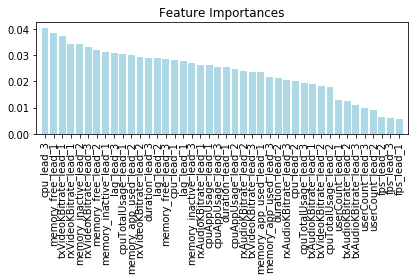

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

feat_labels=X_lead3.columns

for f in range(X_lead3.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_lead3.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_lead3.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_lead3.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

### 结论是特征重要性分布比较均匀，没有特别明显的重要特征，只看到fps、userCount两个特征比较差，可以尝试删掉这两个特征后再用LogisticRegression做次比较，不过对模型效果影响应该很小，这里就把这步省掉了

### 做到这里照理说就应该挑个模型调参了，不过一直有个问题——给的4000个type=0的正常课堂样本一直没用上，想了半天只有一个思路：

### 因为type=1的负样本只有379个，type=2的正样本有648个，unblance_dataset，可以考虑拿一部分type=0的正常课堂样本过来充当负样本，以此抵消样本不平衡、样本量太少带来的负面影响，但这样做本身也有负面影响：这样做本身在一定程度上是拿type=0的样本作为负样本，type=2的样本作为正样本建模，最终预测的却是type=1和2的负、正样本，模型效果的损失估计不会小，下面取极端情况 ：取379个type=0的样本作为负样本，与type=2的648个正样建模，对比下type=1和2建模出来的效果

In [138]:
# 随机抽379个type=0的样本
df_type0=df3[df3['type'] == 0].sample(frac=1)
df_type0_379=df_type0[0:379]

In [139]:
# 取所有type=2的样本，并把lable改成1
df_type2=df3[df3['type'] == 2]
df_type2['type']=df_type2['type'].map(lambda x: x-1)

D:\LQL_software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [140]:
data_type0_2 = pd.concat([df_type0_379,df_type2],axis=0)

In [141]:
lead3_columns_type0_2 = data_type0_2.columns.str.contains('type')+data_type0_2.columns.str.contains(r"lead_1$",regex=True) +data_type0_2.columns.str.contains(r"lead_2$",regex=True)+data_type0_2.columns.str.contains(r"lead_3$",regex=True) 

In [142]:
df_lead3_type0_2 = data_type0_2.loc[:,lead3_columns_type0_2 ]

In [143]:
x_columns_lead3_type0_2 = [x for x in df_lead3_type0_2.columns if x not in ['type']]
X_lead3_type0_2 = df_lead3_type0_2[x_columns_lead3_type0_2]
y_lead3_type0_2 = df_lead3_type0_2['type']

X_train_lead3_type0_2, X_test_lead3_type0_2, y_train_lead3_type0_2, y_test_lead3_type0_2 = train_test_split(X_lead3_type0_2,y_lead3_type0_2,test_size=0.2, random_state=0)

In [144]:
scaler_lead3_type0_2 = StandardScaler()
scaler_lead3_type0_2.fit(X_train_lead3_type0_2)

X_train_lead3_type0_2 = scaler_lead3_type0_2.transform(X_train_lead3_type0_2)
X_test_lead3_type0_2 = scaler_lead3_type0_2.transform(X_test_lead3_type0_2)

In [145]:
classifier_lead3_type0_2=LogisticRegression()
classifier_lead3_type0_2.fit(X_train_lead3_type0_2,y_train_lead3_type0_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
scores_lead3_type0_2=cross_val_score(classifier_lead3_type0_2,X_train_lead3_type0_2,y_train_lead3_type0_2,cv=5)
print('准确率',np.mean(scores_lead3_type0_2),scores_lead3_type0_2)
precisions_lead3_type0_2 = cross_val_score(classifier_lead3_type0_2,X_train_lead3_type0_2, y_train_lead3_type0_2, cv=5, scoring='precision')
print(u'精确率：', np.mean(precisions_lead3_type0_2), precisions_lead3_type0_2)
recalls_lead3_type0_2 = cross_val_score(classifier_lead3_type0_2, X_train_lead3_type0_2, y_train_lead3_type0_2, cv=5, scoring='recall')
print(u'召回率：', np.mean(recalls_lead3_type0_2), recalls_lead3_type0_2)

准确率 0.823364937720766 [0.84242424 0.81818182 0.81818182 0.84662577 0.79141104]
精确率： 0.9066081531823821 [0.90425532 0.9        0.9        0.95238095 0.87640449]
召回率： 0.797185012618909 [0.83333333 0.79411765 0.79411765 0.79207921 0.77227723]


### 果然，type=0和2区分度大，做出来的模型看着好不少，重点看这个模型预测type=1,2咋样了

In [147]:
#召回率
from sklearn.metrics import recall_score
y_predict_lead3_type0_2=classifier_lead3_type0_2.predict(X_train_lead3)   #用的是之前type=1和2的训练集
recall_type0_2 = recall_score(y_train_lead3,y_predict_lead3_type0_2)
print(recall_type0_2)

0.7216890595009597


In [148]:
#精确率
from sklearn.metrics import precision_score
precision_lead3_type0_2 = precision_score(y_train_lead3,y_predict_lead3_type0_2)
print(precision_lead3_type0_2)

0.6762589928057554


### 上一版针对type=1，2的同款模型精确、召回分别为0.65,0.87，也就是说用type=0和2建的模去预测type=1和2的正负样本不可取，泛化效果确实损失很大，这里也不再比较如果只添加一些type=0的样本充当type=1负样本，由此带来的样本量增大，正负样本均衡带来的模型效果提升，和type=0样本带来的信息干扰造成的模型效果降低的最终影响。

### 下面开始调参：选用样本：全量type=1和2的样本，lead1-3共42特征；选用算法：随机森林（原则上线上模型一般用逻辑回归，不过这个模型小，随机森林支持线上问题不大，效果也应该比逻辑回归好不少）

In [85]:
rf0 = RandomForestClassifier(oob_score=True, random_state=10)  
rf0.fit(X_train_lead3,y_train_lead3) 
print(rf0.oob_score_) 
y_predprob_lead3 = rf0.predict_proba(X_test_lead3)[:,1]  
print("AUC Score: %f" % metrics.roc_auc_score(y_test_lead3,y_predprob_lead3)) 

0.5310596833130329
AUC Score: 0.582378


D:\LQL_software\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\LQL_software\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [75]:
y_predict_lead3=rf0.predict(X_test_lead3)
recall_rf0 = recall_score(y_test_lead3,y_predict_lead3)
print(recall_rf0)
precision_rf0 = precision_score(y_test_lead3,y_predict_lead3)
print(precision_rf0)

0.7086614173228346
0.6716417910447762


### 默认参数下，随机森林居然比不上逻辑回归……不调随机森林了，回头去调逻辑回归

In [80]:
clf0 = LogisticRegression(random_state=0,n_jobs=-1)
roc_auc0 = cross_val_score(clf0,X_train_lead3, y_train_lead3, cv=5, scoring='roc_auc')
print(u'roc_auc：', np.mean(roc_auc0),roc_auc0)

roc_auc： 0.5584148351648353 [0.62428571 0.57596154 0.50769231 0.58269231 0.50144231]


D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not

In [82]:
from sklearn.linear_model import LogisticRegressionCV
clf1 = LogisticRegressionCV(cv=10,random_state=0,n_jobs=-1)
roc_auc1 = cross_val_score(clf1,X_train_lead3, y_train_lead3, cv=5, scoring='roc_auc')
print(u'roc_auc：', np.mean(roc_auc1),roc_auc1)

roc_auc： 0.5518968253968254 [0.61365079 0.54182692 0.54919872 0.53429487 0.52051282]


In [84]:
clf1.fit(X_train_lead3,y_train_lead3)
clf1.C_

array([0.0001])

In [87]:
scores_lead3_clf1=cross_val_score(clf1,X_train_lead3,y_train_lead3,cv=5)
print('准确率',np.mean(scores_lead3_clf1),scores_lead3_clf1)
precisions_lead3_clf1 = cross_val_score(clf1,X_train_lead3, y_train_lead3, cv=5, scoring='precision')
print(u'精确率：', np.mean(precisions_lead3_clf1), precisions_lead3_clf1)
recalls_lead3_clf1 = cross_val_score(clf1, X_train_lead3, y_train_lead3, cv=5, scoring='recall')
print(u'召回率：', np.mean(recalls_lead3_clf1), recalls_lead3_clf1)

准确率 0.6382483370288249 [0.63636364 0.63414634 0.65243902 0.63414634 0.63414634]
精确率： 0.6372843042691045 [0.63636364 0.63414634 0.64596273 0.63414634 0.63580247]
召回率： 0.998076923076923 [1.         1.         1.         1.         0.99038462]


### 至今最好的结果，查全率0.998，即正样本全部查到，查准率=0.64，但考虑到负样本379/正负样本1027=0.63——此模型基本等同于全部预测为type=2的模型

In [95]:
clf2 = LogisticRegression(class_weight='balanced',random_state=0,n_jobs=-1)
roc_auc2 = cross_val_score(clf2,X_train_lead3, y_train_lead3, cv=5, scoring='roc_auc')
print(u'roc_auc：', np.mean(roc_auc2),roc_auc2)

roc_auc： 0.5558183760683761 [0.62444444 0.57291667 0.50496795 0.57884615 0.49791667]


D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
D:\LQL_software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not

### 试了下class_weight='balanced'，也很差，因为type=1的负样本少，用这个实际是提高了负样本的权重

### 最后想到的办法，往type=1的样本中加入type=0的样本，使正负样本1:1先看下效果

In [98]:
df_type0_269=df_type0[0:269]

In [106]:
data_type0_1_2 = pd.concat([df_type0_269,df4],axis=0)

In [108]:
data_type0_1_2['type'].value_counts()

1    648
0    648
Name: type, dtype: int64

In [110]:
lead3_columns_type0_1_2 = data_type0_1_2.columns.str.contains('type')+data_type0_1_2.columns.str.contains(r"lead_1$",regex=True) +data_type0_1_2.columns.str.contains(r"lead_2$",regex=True)+data_type0_1_2.columns.str.contains(r"lead_3$",regex=True) 

In [111]:
df_lead3_type0_1_2 = data_type0_1_2.loc[:,lead3_columns_type0_1_2 ]

In [122]:
x_columns_lead3_type0_1_2 = [x for x in df_lead3_type0_1_2.columns if x not in ['type']]
X_lead3_type0_1_2 = data_type0_1_2[x_columns_lead3_type0_1_2]
y_lead3_type0_1_2 = data_type0_1_2['type']

X_train_lead3_type0_1_2, X_test_lead3_type0_1_2, y_train_lead3_type0_1_2, y_test_lead3_type0_1_2 = train_test_split(X_lead3_type0_1_2,y_lead3_type0_1_2,test_size=0.2, random_state=0)

In [123]:
scaler_lead3_type0_1_2 = StandardScaler()
scaler_lead3_type0_1_2.fit(X_train_lead3_type0_1_2)

X_train_lead3_type0_1_2 = scaler_lead3_type0_1_2.transform(X_train_lead3_type0_1_2)
X_test_lead3_type0_1_2 = scaler_lead3_type0_1_2.transform(X_test_lead3_type0_1_2)

In [124]:
classifier_lead3_type0_1_2=LogisticRegression()
classifier_lead3_type0_1_2.fit(X_train_lead3_type0_1_2,y_train_lead3_type0_1_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
scores_lead3_type0_1_2=cross_val_score(classifier_lead3_type0_1_2,X_train_lead3_type0_1_2,y_train_lead3_type0_1_2,cv=5)
print('准确率',np.mean(scores_lead3_type0_1_2),scores_lead3_type0_1_2)
precisions_lead3_type0_1_2 = cross_val_score(classifier_lead3_type0_1_2,X_train_lead3_type0_1_2, y_train_lead3_type0_1_2, cv=5, scoring='precision')
print(u'精确率：', np.mean(precisions_lead3_type0_1_2), precisions_lead3_type0_1_2)
recalls_lead3_type0_1_2 = cross_val_score(classifier_lead3_type0_1_2, X_train_lead3_type0_1_2, y_train_lead3_type0_1_2, cv=5, scoring='recall')
print(u'召回率：', np.mean(recalls_lead3_type0_1_2), recalls_lead3_type0_1_2)

准确率 0.6736496249634706 [0.67788462 0.74038462 0.66183575 0.64251208 0.64563107]
精确率： 0.6845350241545893 [0.66086957 0.75       0.68888889 0.65625    0.66666667]
召回率： 0.6472740851381629 [0.73076923 0.72115385 0.59615385 0.60576923 0.58252427]


In [128]:
#召回率
y_predict_lead3_type0_1_2=classifier_lead3_type0_1_2.predict(X_train_lead3)   #用的是之前type=1和2的训练集
recall_type0_1_2 = recall_score(y_train_lead3,y_predict_lead3_type0_1_2)
print(recall_type0_1_2)

0.6084452975047985


In [129]:
#精确率
precision_lead3_type0_1_2  = precision_score(y_train_lead3,y_predict_lead3_type0_1_2)
print(precision_lead3_type0_1_2 )

0.7028824833702882


### 还是不行……至今模型最佳效果=不管正例反例全部预测为正例………………